# TITLE : MODELS OF VISCOSITY FROM COMPOSITIONAL DATA MWC7+  TEMP PRESSURE USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF VISCOSITY USING WIDE RANGE OF COMPOSITION DATA.


ONCE DATA PRE PROCESS FINAL TRAIN TEST FILE EXPORTED TO DATASOURCE FOR MODEL PREPARATION AND VALIDATION AND ALL OTHER REQUIRED 
DATA EXPORTED TO EXPORT FILE FOR REFERENCING AND ALL.


kINDLY NOTE THAT MAJOR OBJECTIVE OF THIS FILE IS TO NOT EFFECT TRAINING OF MODEL WHICH TAKE TIME FOR HYPERPARAMETER OPTIMIZATION

THIS FILE USED FOR GRAPH PREAPRATION AS WELL AS PREPARATION OF DATA.




In [1]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

## 2. PREPARING DATASET FOR MODELLING

                                  #### Importing data from system to python ####

In [2]:
#IMPORTANT PATH LOCATION FOR OPERATION LISTED HERE 

path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\DATASOURCE\\"
filename = "VISCOSITY RAWDATA.xlsx"
sheet_name = "DATA"

export_data_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\EXPORTED DATA\\"

figure_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\FIGURES\\"


In [3]:
## Data stored into data variable
df = pd.read_excel(path+filename,sheet_name = sheet_name,float_format="%.6f")

                                    #### Looking into first five rows ####

In [4]:
df.head()

,Ref. Name,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,P,VISCOSITY
0,F1,0.0,0.0036,0.0017,0.2723,0.0893,0.0860,0.0607,0.0371,0.0255,0.4238,271.0,363.150000,92.857143,0.51
1,F2,0.0,0.0029,0.0048,0.2836,0.0829,0.0738,0.0506,0.0342,0.0441,0.4231,252.0,364.816667,111.020408,1.12
2,F3,0.0,0.0033,0.0022,0.2556,0.0687,0.0639,0.0561,0.0468,0.0433,0.4601,222.0,364.816667,108.503401,1.25
3,F4,0.0,0.0035,0.0047,0.2652,0.0771,0.0605,0.0403,0.0408,0.0422,0.4657,253.0,365.927778,102.040816,1.35
4,F5,0.0,0.0012,0.0051,0.2881,0.0791,0.0646,0.0317,0.0207,0.0325,0.4770,250.0,365.372222,109.863946,1.24


In [5]:
df.columns

Index(['Ref. Name', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7+', 'MWC7+', 'Temp', 'P', 'VISCOSITY'],
      dtype='object')

In [6]:
#REMOVING Sr.No COLUMNS FROM DATA 
data = df[['H2S', 'N2', 'CO2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7+',
       'MWC7+', 'Temp', 'P', 'VISCOSITY']]

In [7]:
data.shape

(282, 14)

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H2S,282.0,0.000369,0.002768,0.000000,0.000000,0.000000,0.000000,0.036800
N2,282.0,0.003725,0.004265,0.000000,0.001400,0.003000,0.004875,0.056000
CO2,282.0,0.016749,0.028994,0.000000,0.004825,0.009000,0.018800,0.190200
C1,282.0,0.307545,0.107999,0.029000,0.217075,0.307800,0.354200,0.725700
C2,282.0,0.068234,0.034806,0.000257,0.059914,0.067200,0.076875,0.212921
C3,282.0,0.068463,0.054959,0.000043,0.058190,0.064250,0.079000,0.354379
C4,282.0,0.049952,0.027097,0.000046,0.034225,0.053950,0.063920,0.158306
C5,282.0,0.035549,0.016698,0.000054,0.022600,0.040690,0.050800,0.064000
C6,282.0,0.031122,0.014408,0.000200,0.020600,0.032900,0.042200,0.083000
C7+,282.0,0.418548,0.149904,0.003500,0.333500,0.387300,0.525250,0.902000


In [9]:
#COPYING DATASET INTO NEW VARIABLE TO PERFORM OPERATION IN PRIVIOUS DATA IN FUTURE
new_data = data.copy()

                       #### Removing missing values and Duplicates records present ####

In [10]:
#LOOKING FOR MISSING VALUES
new_data.isnull().sum()

H2S          0
N2           0
CO2          0
C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7+          0
MWC7+        0
Temp         0
P            0
VISCOSITY    0
dtype: int64

<AxesSubplot:>

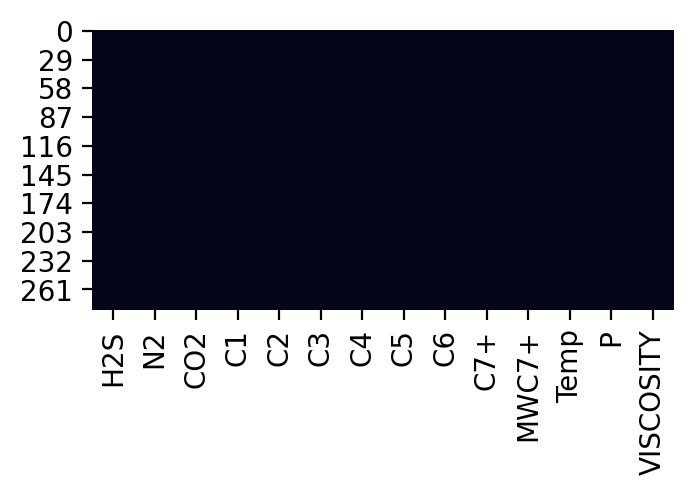

In [11]:
#Heatmap to vizualize null values

fig1 = plt.figure(figsize = (3.75,1.85),dpi=200)
sns.heatmap(new_data.isnull() , cbar = False)

In [12]:
##Removing missing values present however no missing values were present.
data_dropna = new_data.dropna()

<AxesSubplot:>

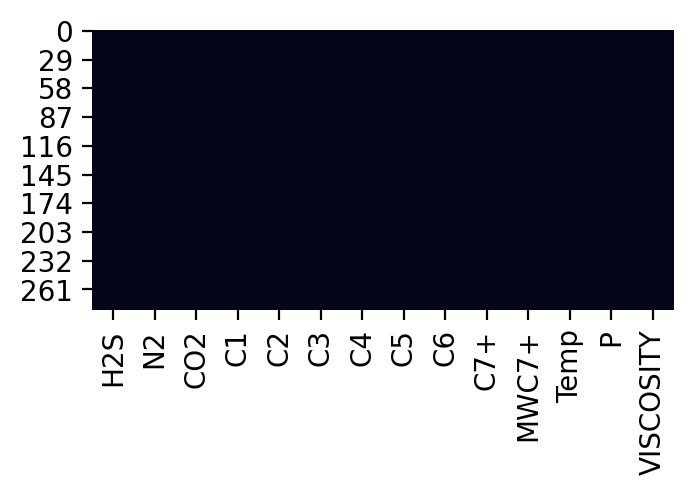

In [13]:
plt.figure(figsize = (3.75,1.85),dpi=200)
sns.heatmap(data_dropna.isnull() , cbar = False)

In [14]:
#Prepare Subplot If required


In [15]:
#cheking for duplicate values because data taken from litureature hence possibility to duplicate values
data_dropna.duplicated().sum()

0

In [16]:
#droping duplicate values 
data_dropna_duplicate = data_dropna.drop_duplicates()

In [17]:
#df.iloc[data_dropna_duplicate.index].to_excel("FINAL_PSAT_DATA_REF.xlsx")

In [18]:
##Storing data into raw_data for further calculation 
raw_data = data_dropna_duplicate.copy()

In [19]:
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H2S,282.0,0.000369,0.002768,0.000000,0.000000,0.000000,0.000000,0.036800
N2,282.0,0.003725,0.004265,0.000000,0.001400,0.003000,0.004875,0.056000
CO2,282.0,0.016749,0.028994,0.000000,0.004825,0.009000,0.018800,0.190200
C1,282.0,0.307545,0.107999,0.029000,0.217075,0.307800,0.354200,0.725700
C2,282.0,0.068234,0.034806,0.000257,0.059914,0.067200,0.076875,0.212921
C3,282.0,0.068463,0.054959,0.000043,0.058190,0.064250,0.079000,0.354379
C4,282.0,0.049952,0.027097,0.000046,0.034225,0.053950,0.063920,0.158306
C5,282.0,0.035549,0.016698,0.000054,0.022600,0.040690,0.050800,0.064000
C6,282.0,0.031122,0.014408,0.000200,0.020600,0.032900,0.042200,0.083000
C7+,282.0,0.418548,0.149904,0.003500,0.333500,0.387300,0.525250,0.902000


In [20]:
#Share To excel If required



In [21]:
new_raw_data_old = raw_data.copy()

In [22]:
new_raw_data_old.columns

Index(['H2S', 'N2', 'CO2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7+', 'MWC7+',
       'Temp', 'P', 'VISCOSITY'],
      dtype='object')

C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-25-fbdd1350b763>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(figure_path + "Visc_BOX.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-25-fbdd1350b763>:26: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig1.savefig(figure_path + "V

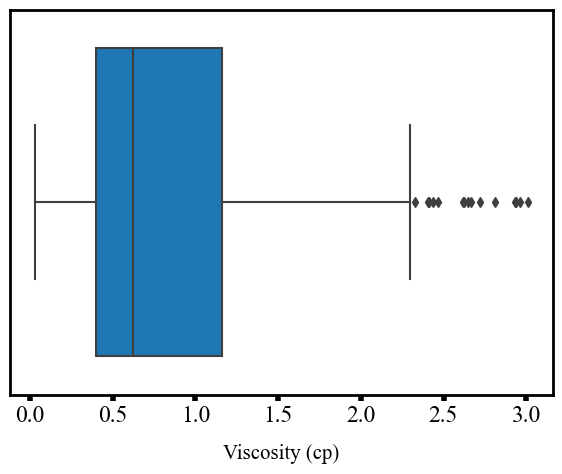

In [25]:
#Removing Outliers in step by step manner by looking into box plot
#First remove outliers from the MWC7+ as very few records are there.
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams["font.family"] = "Times New Roman"

fig1 = plt.figure(figsize=(7,5))
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)



mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.width'] = 0
ax = sns.boxplot(new_raw_data_old["VISCOSITY"] , saturation = 10)

#Changing Border thickness of all subplots

for axis in ['top', 'bottom', 'left', 'right']:
    locals()["ax"].spines[axis].set_linewidth(2)
        
plt.xlabel("Viscosity (cp)", fontsize = 15,labelpad = 12)
fig1.savefig(figure_path + "Visc_BOX.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")



In [26]:
new_raw_data_old_1 = new_raw_data_old.copy()

C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-27-738e94c97125>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(figure_path + "P_box.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-27-738e94c97125>:26: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig1.savefig(figure_path + "P_bo

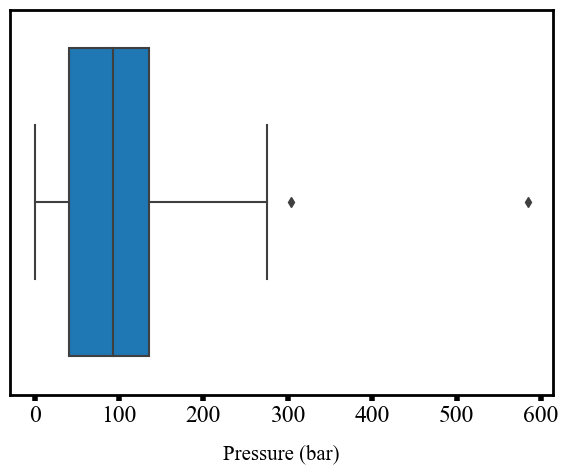

In [27]:
#Removing Outliers in step by step manner by looking into box plot
#First remove outliers from the MWC7+ as very few records are there.
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams["font.family"] = "Times New Roman"

fig1 = plt.figure(figsize=(7,5))
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)



mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.width'] = 0
ax = sns.boxplot(new_raw_data_old["P"] , saturation = 10)

#Changing Border thickness of all subplots

for axis in ['top', 'bottom', 'left', 'right']:
    locals()["ax"].spines[axis].set_linewidth(2)
        
plt.xlabel("Pressure (bar)", fontsize = 15,labelpad = 12)
fig1.savefig(figure_path + "P_box.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")



C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-28-0452b72a8535>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(figure_path + "T_box.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-28-0452b72a8535>:26: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig1.savefig(figure_path + "T_bo

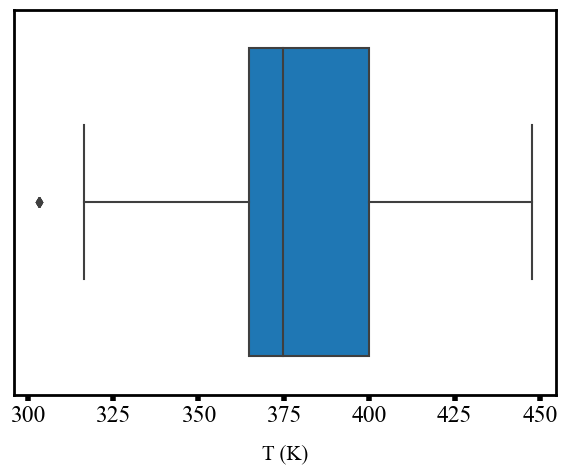

In [28]:
#Removing Outliers in step by step manner by looking into box plot
#First remove outliers from the MWC7+ as very few records are there.
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams["font.family"] = "Times New Roman"

fig1 = plt.figure(figsize=(7,5))
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)



mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.width'] = 0
ax = sns.boxplot(new_raw_data_old["Temp"] , saturation = 10)

#Changing Border thickness of all subplots

for axis in ['top', 'bottom', 'left', 'right']:
    locals()["ax"].spines[axis].set_linewidth(2)
        
plt.xlabel("T (K)", fontsize = 15,labelpad = 12)
fig1.savefig(figure_path + "T_box.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")



C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-29-2eb4b827dbdf>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(figure_path + "MW_box.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-29-2eb4b827dbdf>:26: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig1.savefig(figure_path + "MW_

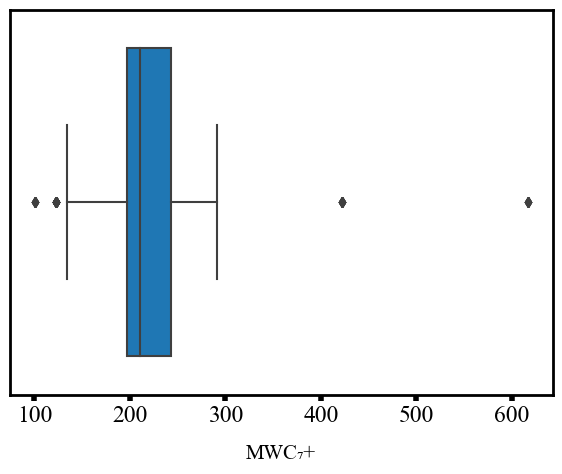

In [29]:
#Removing Outliers in step by step manner by looking into box plot
#First remove outliers from the MWC7+ as very few records are there.
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams["font.family"] = "Times New Roman"

fig1 = plt.figure(figsize=(7,5))
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)



mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.width'] = 0
ax = sns.boxplot(new_raw_data_old["MWC7+"] , saturation = 10)

#Changing Border thickness of all subplots

for axis in ['top', 'bottom', 'left', 'right']:
    locals()["ax"].spines[axis].set_linewidth(2)
        
plt.xlabel("MWC\u2087+", fontsize = 15,labelpad = 12)
fig1.savefig(figure_path + "MW_box.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")



In [30]:
new_raw_data_old_2 = new_raw_data_old_1.copy()

In [31]:
new_raw_data = new_raw_data_old_2.copy()

In [32]:
new_raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H2S,282.0,0.000369,0.002768,0.000000,0.000000,0.000000,0.000000,0.036800
N2,282.0,0.003725,0.004265,0.000000,0.001400,0.003000,0.004875,0.056000
CO2,282.0,0.016749,0.028994,0.000000,0.004825,0.009000,0.018800,0.190200
C1,282.0,0.307545,0.107999,0.029000,0.217075,0.307800,0.354200,0.725700
C2,282.0,0.068234,0.034806,0.000257,0.059914,0.067200,0.076875,0.212921
C3,282.0,0.068463,0.054959,0.000043,0.058190,0.064250,0.079000,0.354379
C4,282.0,0.049952,0.027097,0.000046,0.034225,0.053950,0.063920,0.158306
C5,282.0,0.035549,0.016698,0.000054,0.022600,0.040690,0.050800,0.064000
C6,282.0,0.031122,0.014408,0.000200,0.020600,0.032900,0.042200,0.083000
C7+,282.0,0.418548,0.149904,0.003500,0.333500,0.387300,0.525250,0.902000


In [33]:
new_raw_data.describe().transpose().to_excel(export_data_path+"STAT_V.xlsx")

## 3. Exploratery Data Analysis

                                    #### Computing Corelationship matrix ####

In [34]:
#paerson Corelation matrix
new_raw_data.corr()

,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,P,VISCOSITY
H2S,1.000000,-0.004492,0.029224,-0.150285,0.021083,0.004823,-0.005689,0.055398,-0.011416,0.073343,0.042416,0.158818,-0.016879,-0.020221
N2,-0.004492,1.000000,0.245009,-0.200251,0.095814,0.139276,0.150774,0.088534,0.102178,-0.052054,-0.209781,-0.082182,-0.084135,0.115101
CO2,0.029224,0.245009,1.000000,-0.030641,0.286338,0.141932,0.202001,0.236705,0.074351,-0.368274,-0.209979,0.244577,-0.054835,-0.183304
C1,-0.150285,-0.200251,-0.030641,1.000000,0.091842,-0.212086,-0.356778,-0.364526,-0.342896,-0.509853,0.069597,0.073933,0.620009,-0.159647
C2,0.021083,0.095814,0.286338,0.091842,1.000000,0.888721,0.783102,0.249819,-0.019382,-0.849377,-0.572432,-0.286195,0.024299,-0.217656
C3,0.004823,0.139276,0.141932,-0.212086,0.888721,1.000000,0.902321,0.270372,-0.043296,-0.640503,-0.524331,-0.359807,-0.183701,-0.242911
C4,-0.005689,0.150774,0.202001,-0.356778,0.783102,0.902321,1.000000,0.630905,0.294697,-0.578243,-0.629060,-0.258572,-0.332475,-0.290733
C5,0.055398,0.088534,0.236705,-0.364526,0.249819,0.270372,0.630905,1.000000,0.788523,-0.244753,-0.482302,0.073441,-0.372935,-0.254156
C6,-0.011416,0.102178,0.074351,-0.342896,-0.019382,-0.043296,0.294697,0.788523,1.000000,0.013070,-0.221501,0.162956,-0.279305,-0.061893
C7+,0.073343,-0.052054,-0.368274,-0.509853,-0.849377,-0.640503,-0.578243,-0.244753,0.013070,1.000000,0.509377,0.120225,-0.241960,0.372936


In [35]:
#sparerman Corelation matrix
new_raw_data.corr("spearman")

,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,P,VISCOSITY
H2S,1.000000,-0.011396,0.105394,-0.179564,0.066014,0.086372,0.016240,0.075023,0.039786,0.095451,0.214306,0.141694,0.038905,0.105385
N2,-0.011396,1.000000,-0.111450,-0.186332,-0.025499,0.351327,0.226097,-0.068117,-0.189519,-0.034989,-0.276942,-0.152600,-0.097807,0.133529
CO2,0.105394,-0.111450,1.000000,-0.044814,0.233615,0.274692,0.552853,0.668488,0.446660,-0.350544,-0.457112,0.296205,-0.248967,-0.338108
C1,-0.179564,-0.186332,-0.044814,1.000000,0.262285,-0.270116,-0.466640,-0.363967,-0.352882,-0.646265,0.120963,-0.003410,0.522530,-0.141581
C2,0.066014,-0.025499,0.233615,0.262285,1.000000,0.605522,0.320380,0.169664,0.144555,-0.720636,-0.331140,-0.098959,0.160479,-0.148280
C3,0.086372,0.351327,0.274692,-0.270116,0.605522,1.000000,0.768608,0.415153,0.178899,-0.342211,-0.679732,-0.216345,-0.246762,-0.051410
C4,0.016240,0.226097,0.552853,-0.466640,0.320380,0.768608,1.000000,0.788153,0.514182,-0.182680,-0.660245,-0.027410,-0.466049,-0.205104
C5,0.075023,-0.068117,0.668488,-0.363967,0.169664,0.415153,0.788153,1.000000,0.819777,-0.107252,-0.378004,0.186874,-0.386771,-0.186527
C6,0.039786,-0.189519,0.446660,-0.352882,0.144555,0.178899,0.514182,0.819777,1.000000,0.052551,-0.104902,0.200118,-0.260592,0.001741
C7+,0.095451,-0.034989,-0.350544,-0.646265,-0.720636,-0.342211,-0.182680,-0.107252,0.052551,1.000000,0.342470,-0.010370,-0.267360,0.397156


In [36]:
#Share TO excel If neccesory

In [37]:
#Share TO excel If neccesory
new_raw_data_c = new_raw_data.copy()
new_raw_data_c.columns = ["H\u2082S","N\u2082","CO\u2082","C\u2081","C\u2082","C\u2083","C\u2084","C\u2085","C\u2086","C\u2087+","MWC\u2087+","T (k)","P (bar)","Viscosity (cp)"]

<ipython-input-38-52709908c120>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig3.savefig(figure_path + "Corelation.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-38-52709908c120>:14: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig3.savefig(figure_path + "Corelation.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


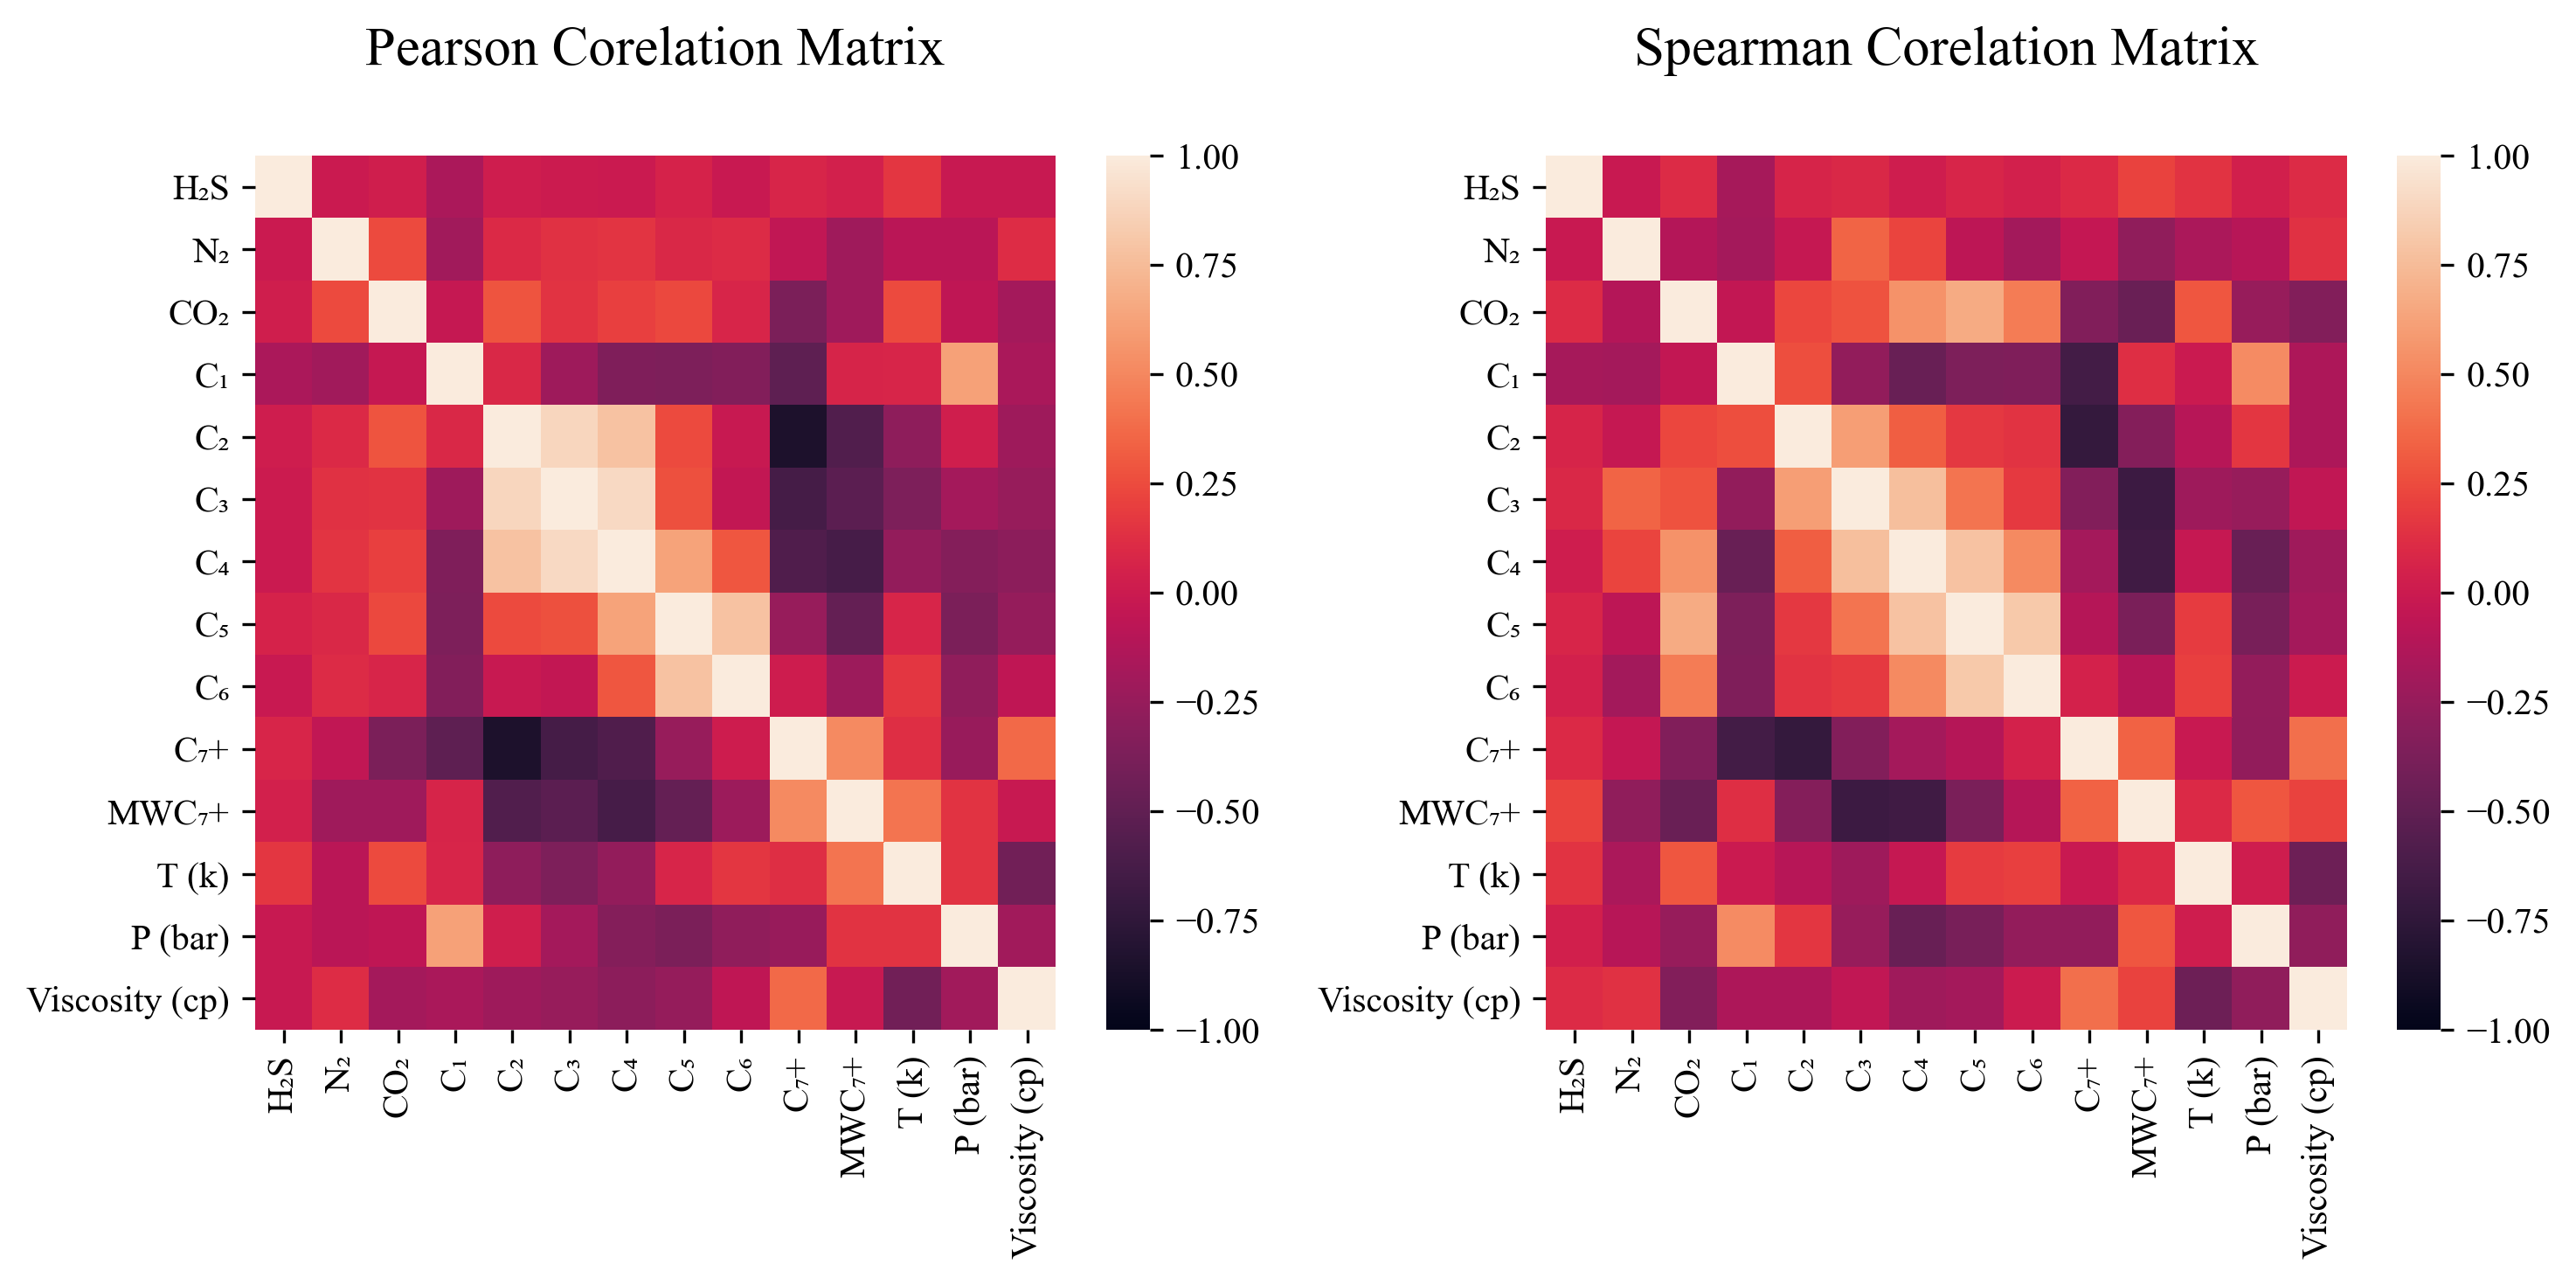

In [38]:
## heat map of corelationship matrix
## heat map of corelationship matrix
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams["font.family"] = "Times New Roman"
fig3 = plt.figure(figsize = (10,5) , dpi = 300)
plt.subplot(1,2,1)
sns.heatmap(new_raw_data_c.corr(),vmax=1,vmin = -1)
plt.title("Pearson Corelation Matrix", fontsize =15, pad = 25)
plt.subplot(1,2,2)
sns.heatmap(new_raw_data_c.corr("spearman"),vmax=1,vmin = -1)
plt.tight_layout()
plt.title("Spearman Corelation Matrix" , fontsize =15, pad = 25)
fig3.savefig(figure_path + "Corelation.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


                          #### HISTOGRAM OF DATA ####

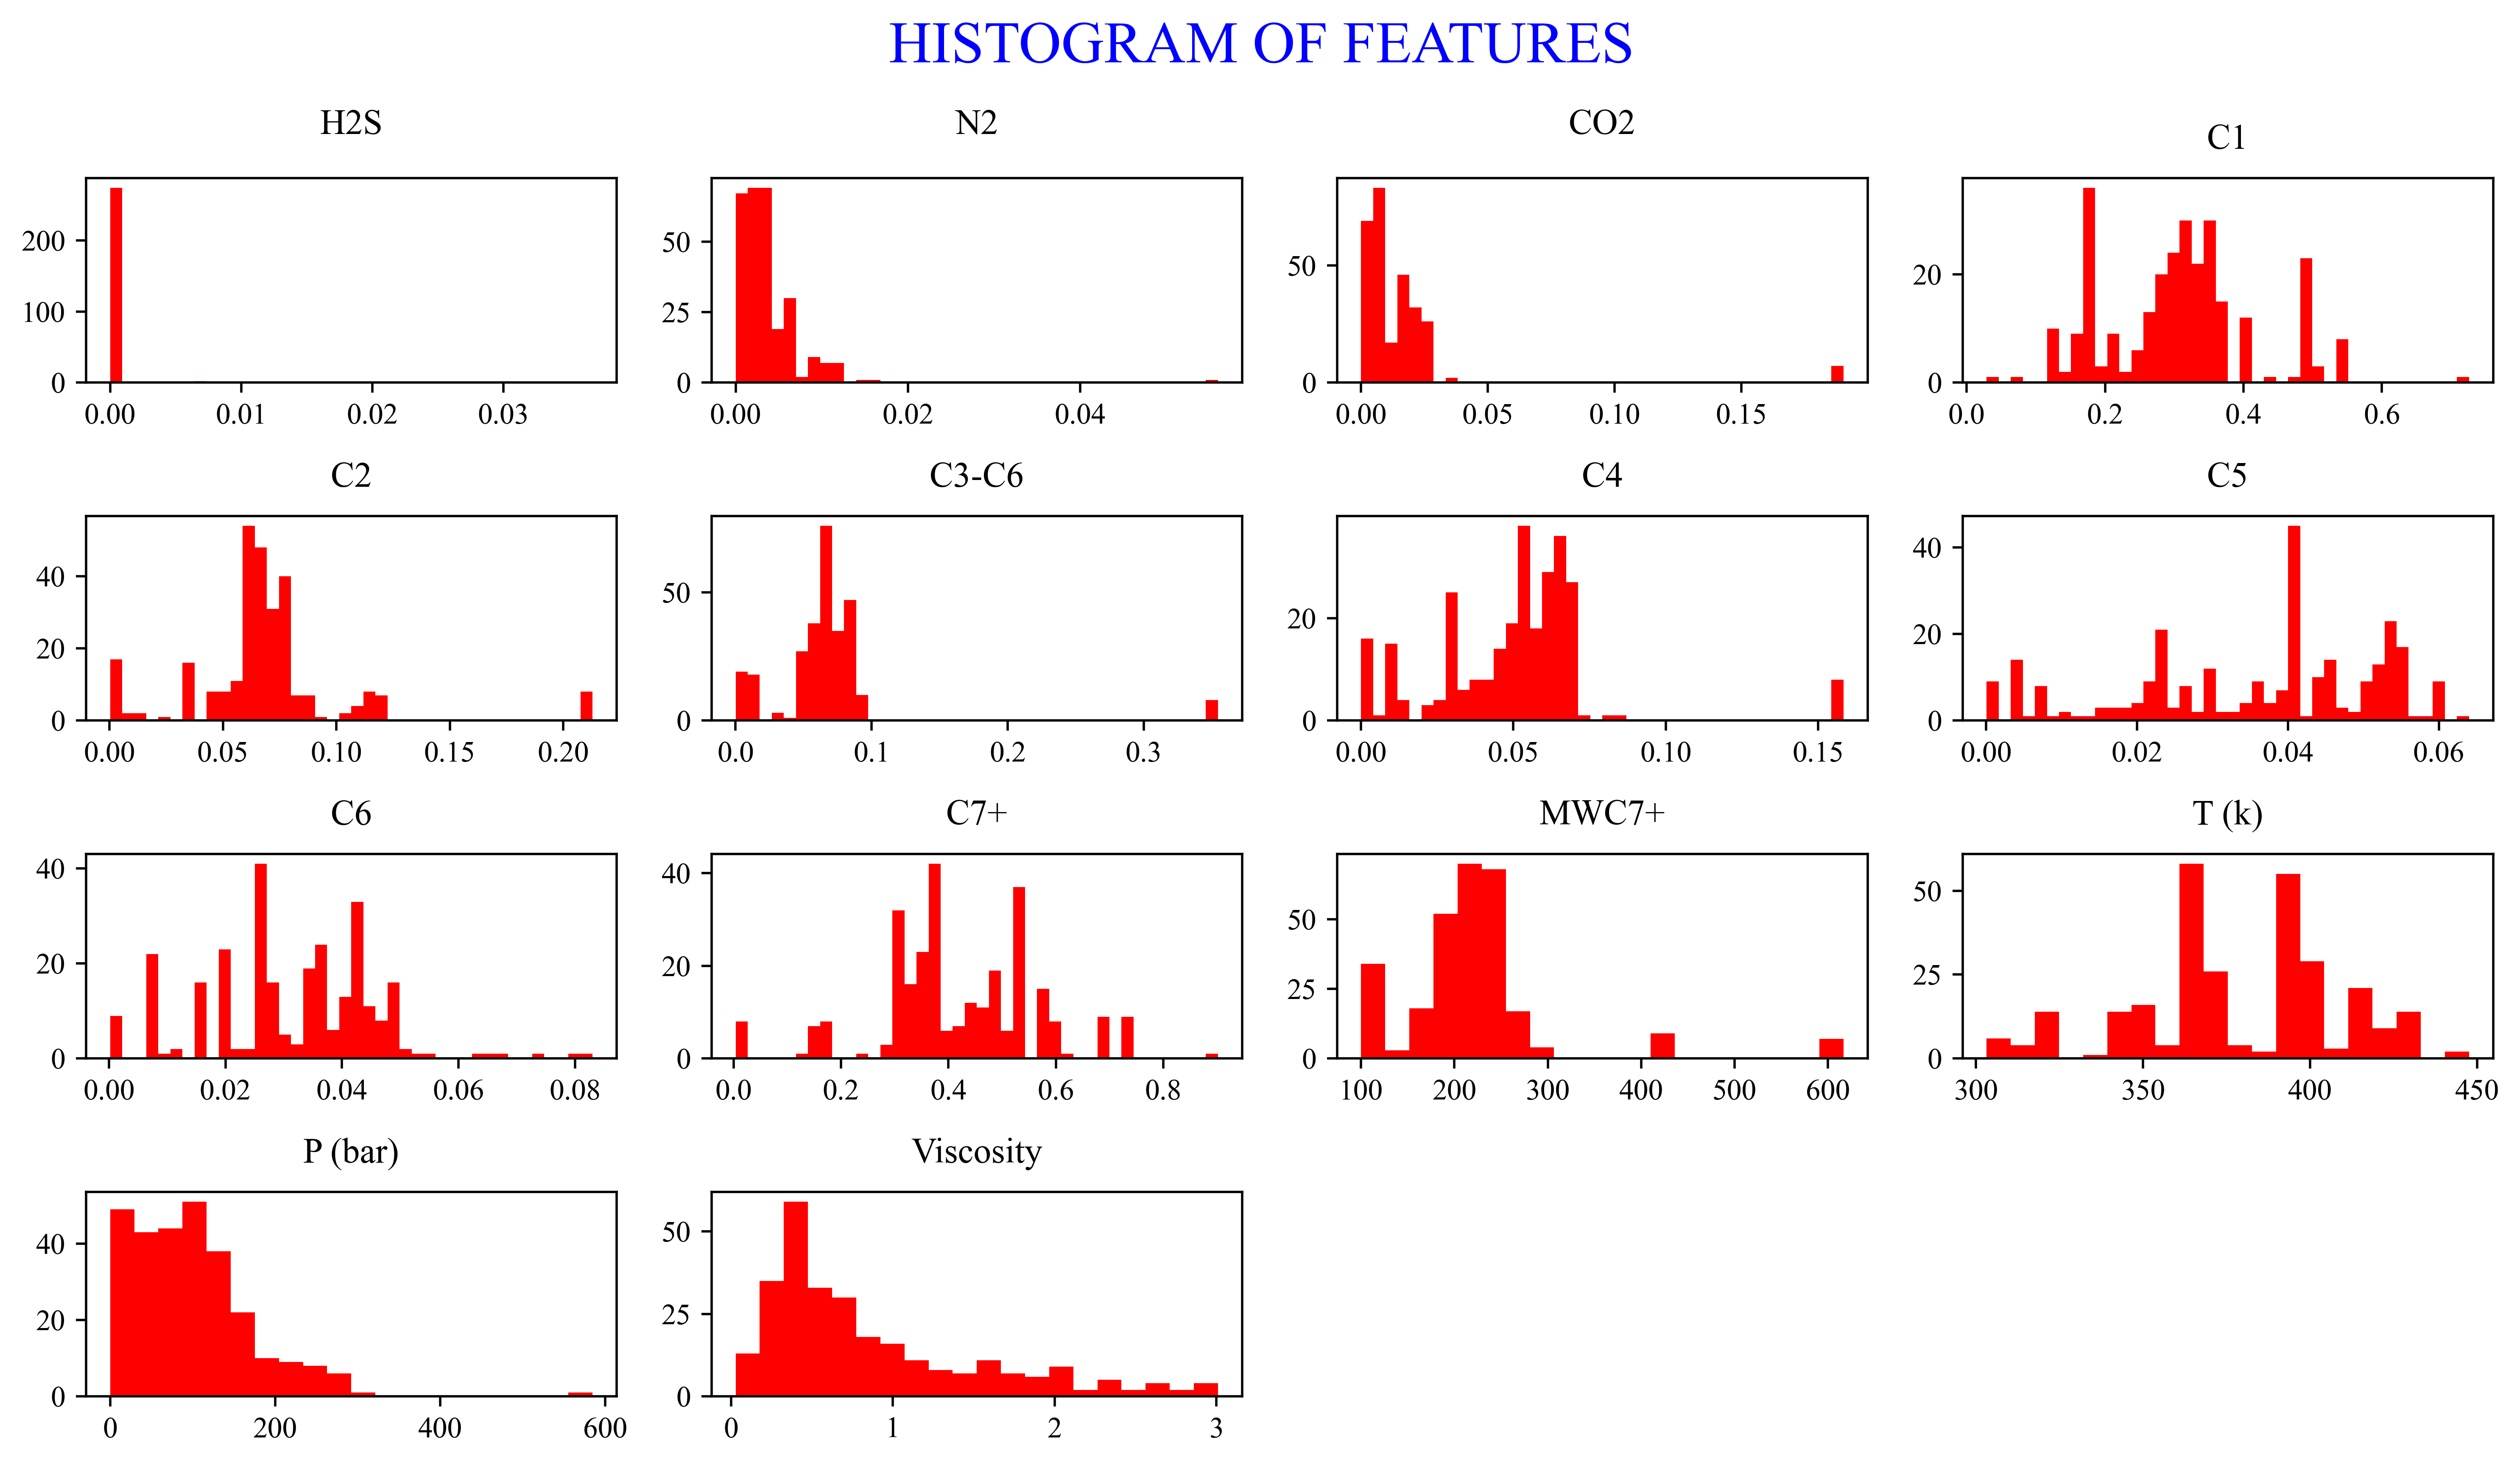

In [39]:
plt.figure(figsize=(12,7) , dpi =500)
plt.suptitle("HISTOGRAM OF FEATURES" , fontsize = 20 , c = "blue")

plt.subplot(4,4,1)
plt.hist(new_raw_data["H2S"], color ="red", bins = 40)
plt.title("H2S" , pad = 15)

plt.subplot(4,4,2)
plt.hist(new_raw_data["N2"], color ="red", bins = 40)
plt.title("N2" , pad = 15)


plt.subplot(4,4,3)
plt.hist(new_raw_data["CO2"], color ="red", bins = 40)
plt.title("CO2" , pad = 15)


plt.subplot(4,4,4)
plt.hist(new_raw_data["C1"], color ="red", bins = 40)
plt.title("C1" , pad = 10)



plt.subplot(4,4,5)
plt.hist(new_raw_data["C2"], color ="red", bins = 40)
plt.title("C2" , pad = 10)



plt.subplot(4,4,6)
plt.hist(new_raw_data["C3"], color ="red", bins = 40)
plt.title("C3-C6" , pad = 10)



plt.subplot(4,4,7)
plt.hist(new_raw_data["C4"], color ="red", bins = 40)
plt.title("C4" , pad = 10)



plt.subplot(4,4,8)
plt.hist(new_raw_data["C5"], color ="red", bins = 40)
plt.title("C5" , pad = 10)


plt.subplot(4,4,9)
plt.hist(new_raw_data["C6"], color ="red", bins = 40)
plt.title("C6" , pad = 10)



plt.subplot(4,4,10)
plt.hist(new_raw_data["C7+"], color ="red", bins = 40)
plt.title("C7+" , pad = 10)


plt.subplot(4,4,11)
plt.hist(new_raw_data["MWC7+"], color ="red", bins = 20)
plt.title("MWC7+" , pad = 10)

plt.subplot(4,4,12)
plt.hist(new_raw_data["Temp"], color ="red", bins = 20)
plt.title("T (k)" , pad = 10)

plt.subplot(4,4,13)
plt.hist(new_raw_data["P"], color ="red", bins = 20)
plt.title("P (bar)" , pad = 10)

plt.subplot(4,4,14)
plt.hist(new_raw_data["VISCOSITY"], color ="red", bins = 20)
plt.title("Viscosity" , pad = 10)



plt.tight_layout()


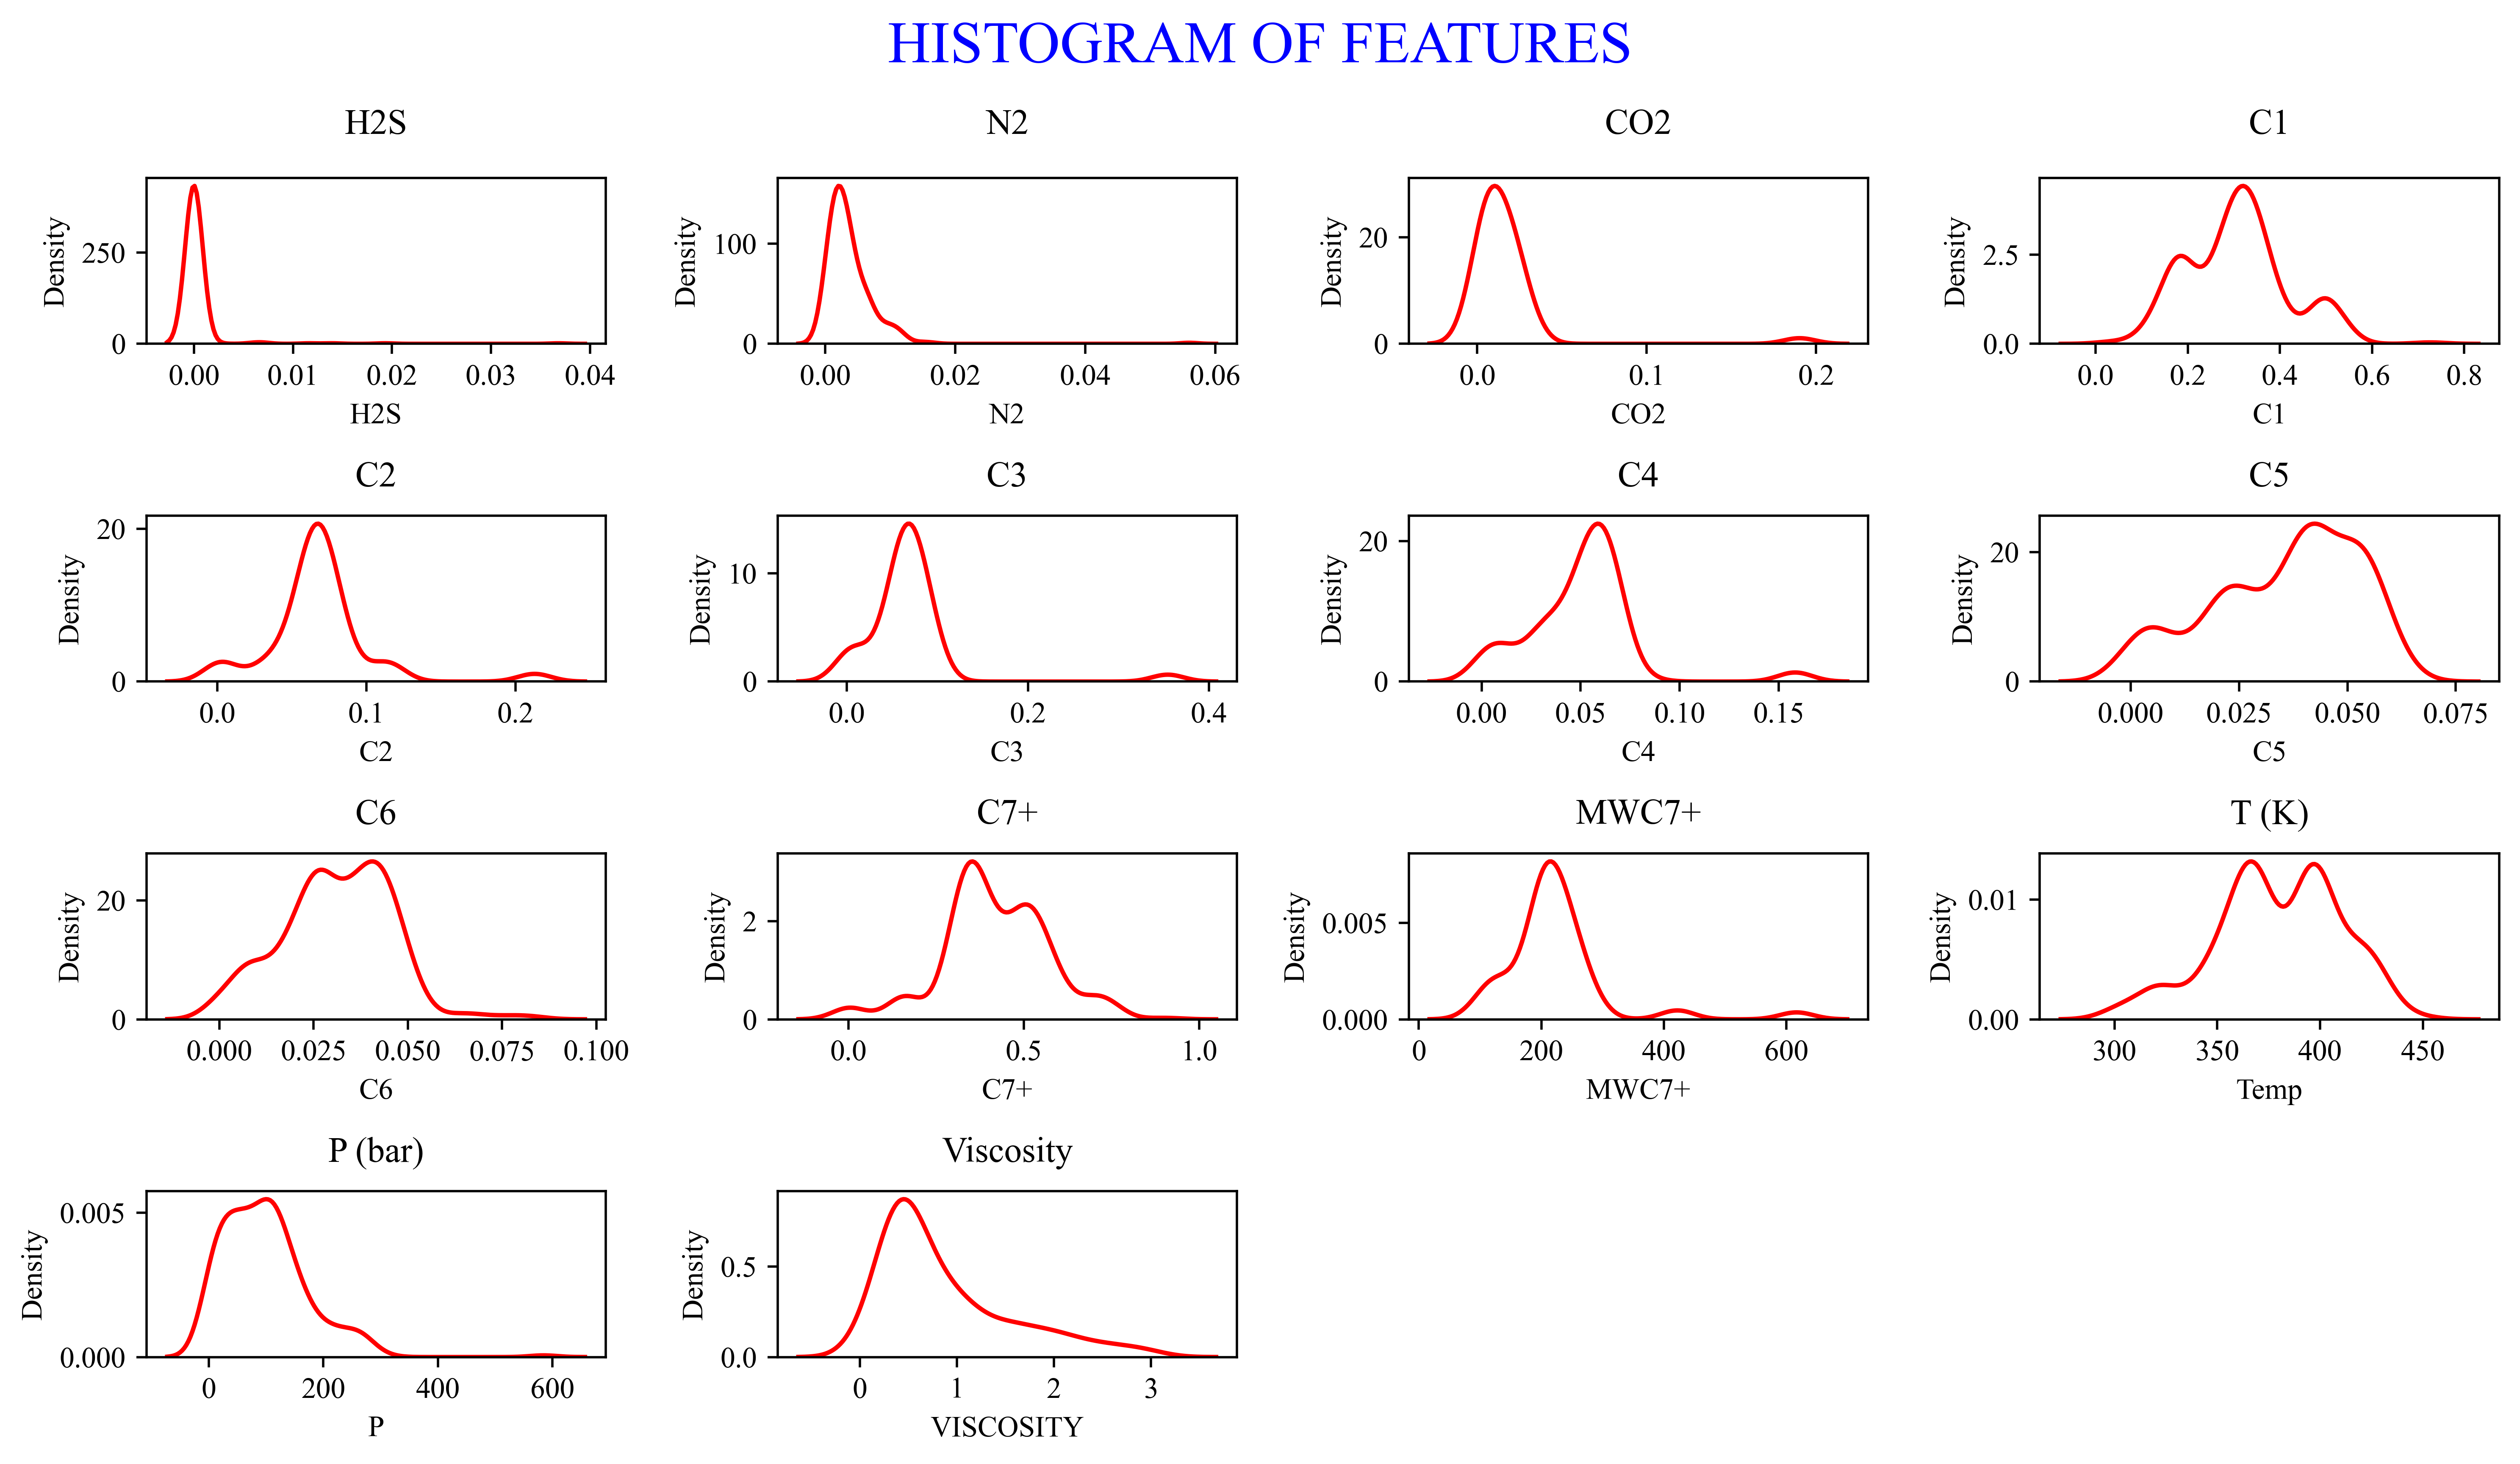

In [40]:
plt.figure(figsize=(12,7) , dpi =500)
plt.suptitle("HISTOGRAM OF FEATURES" , fontsize = 20 , c = "blue")

plt.subplot(4,4,1)
sns.kdeplot(new_raw_data["H2S"], color ="red")
plt.title("H2S" , pad = 15)


plt.subplot(4,4,2)
sns.kdeplot(new_raw_data["N2"], color ="red")
plt.title("N2" , pad = 15)

plt.subplot(4,4,3)
sns.kdeplot(new_raw_data["CO2"], color ="red")
plt.title("CO2" , pad = 15)


plt.subplot(4,4,4)
sns.kdeplot(new_raw_data["C1"], color ="red")
plt.title("C1" , pad = 15)


plt.subplot(4,4,5)
sns.kdeplot(new_raw_data["C2"], color ="red")
plt.title("C2" , pad = 10)



plt.subplot(4,4,6)
sns.kdeplot(new_raw_data["C3"], color ="red")
plt.title("C3" , pad = 10)




plt.subplot(4,4,7)
sns.kdeplot(new_raw_data["C4"], color ="red")
plt.title("C4" , pad = 10)



plt.subplot(4,4,8)
sns.kdeplot(new_raw_data["C5"], color ="red")
plt.title("C5" , pad = 10)


plt.subplot(4,4,9)
sns.kdeplot(new_raw_data["C6"], color ="red")
plt.title("C6" , pad = 10)

plt.subplot(4,4,10)
sns.kdeplot(new_raw_data["C7+"], color ="red")
plt.title("C7+" , pad = 10)

plt.subplot(4,4,11)
sns.kdeplot(new_raw_data["MWC7+"], color ="red")
plt.title("MWC7+" , pad = 10)

plt.subplot(4,4,12)
sns.kdeplot(new_raw_data["Temp"], color ="red")
plt.title("T (K)" , pad = 10)

plt.subplot(4,4,13)
sns.kdeplot(new_raw_data["P"], color ="red")
plt.title("P (bar)" , pad = 10)

plt.subplot(4,4,14)
sns.kdeplot(new_raw_data["VISCOSITY"], color ="red")
plt.title("Viscosity" , pad = 10)


plt.tight_layout()


In [41]:
##Not Removing Outliers Present inside Dataset to check effect
#Use if it required
def outlier_removal(data):
        def outlier_limits(col):
            Q3, Q1 = col.quantile([0.75,0.25])
            IQR= Q3-Q1
            UL= Q3+1.5*IQR
            LL= Q1-1.5*IQR
            return UL, LL

        for column in data.columns:
            if data[column].dtype == 'float64':
                UL, LL= outlier_limits(data[column])
                data[column]= np.where((data[column] > UL) | (data[column] < LL),np.nan, data[column])

        return data

In [42]:
final_dataset = new_raw_data.copy()

In [43]:
final_dataset.shape

(282, 14)

                             #### Scatter Plot of Features vs label ####

<ipython-input-44-ba3d0ef912e4>:144: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig6.savefig(figure_path + "SCATTER PLOT PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-44-ba3d0ef912e4>:144: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig6.savefig(figure_path + "SCATTER PLOT PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


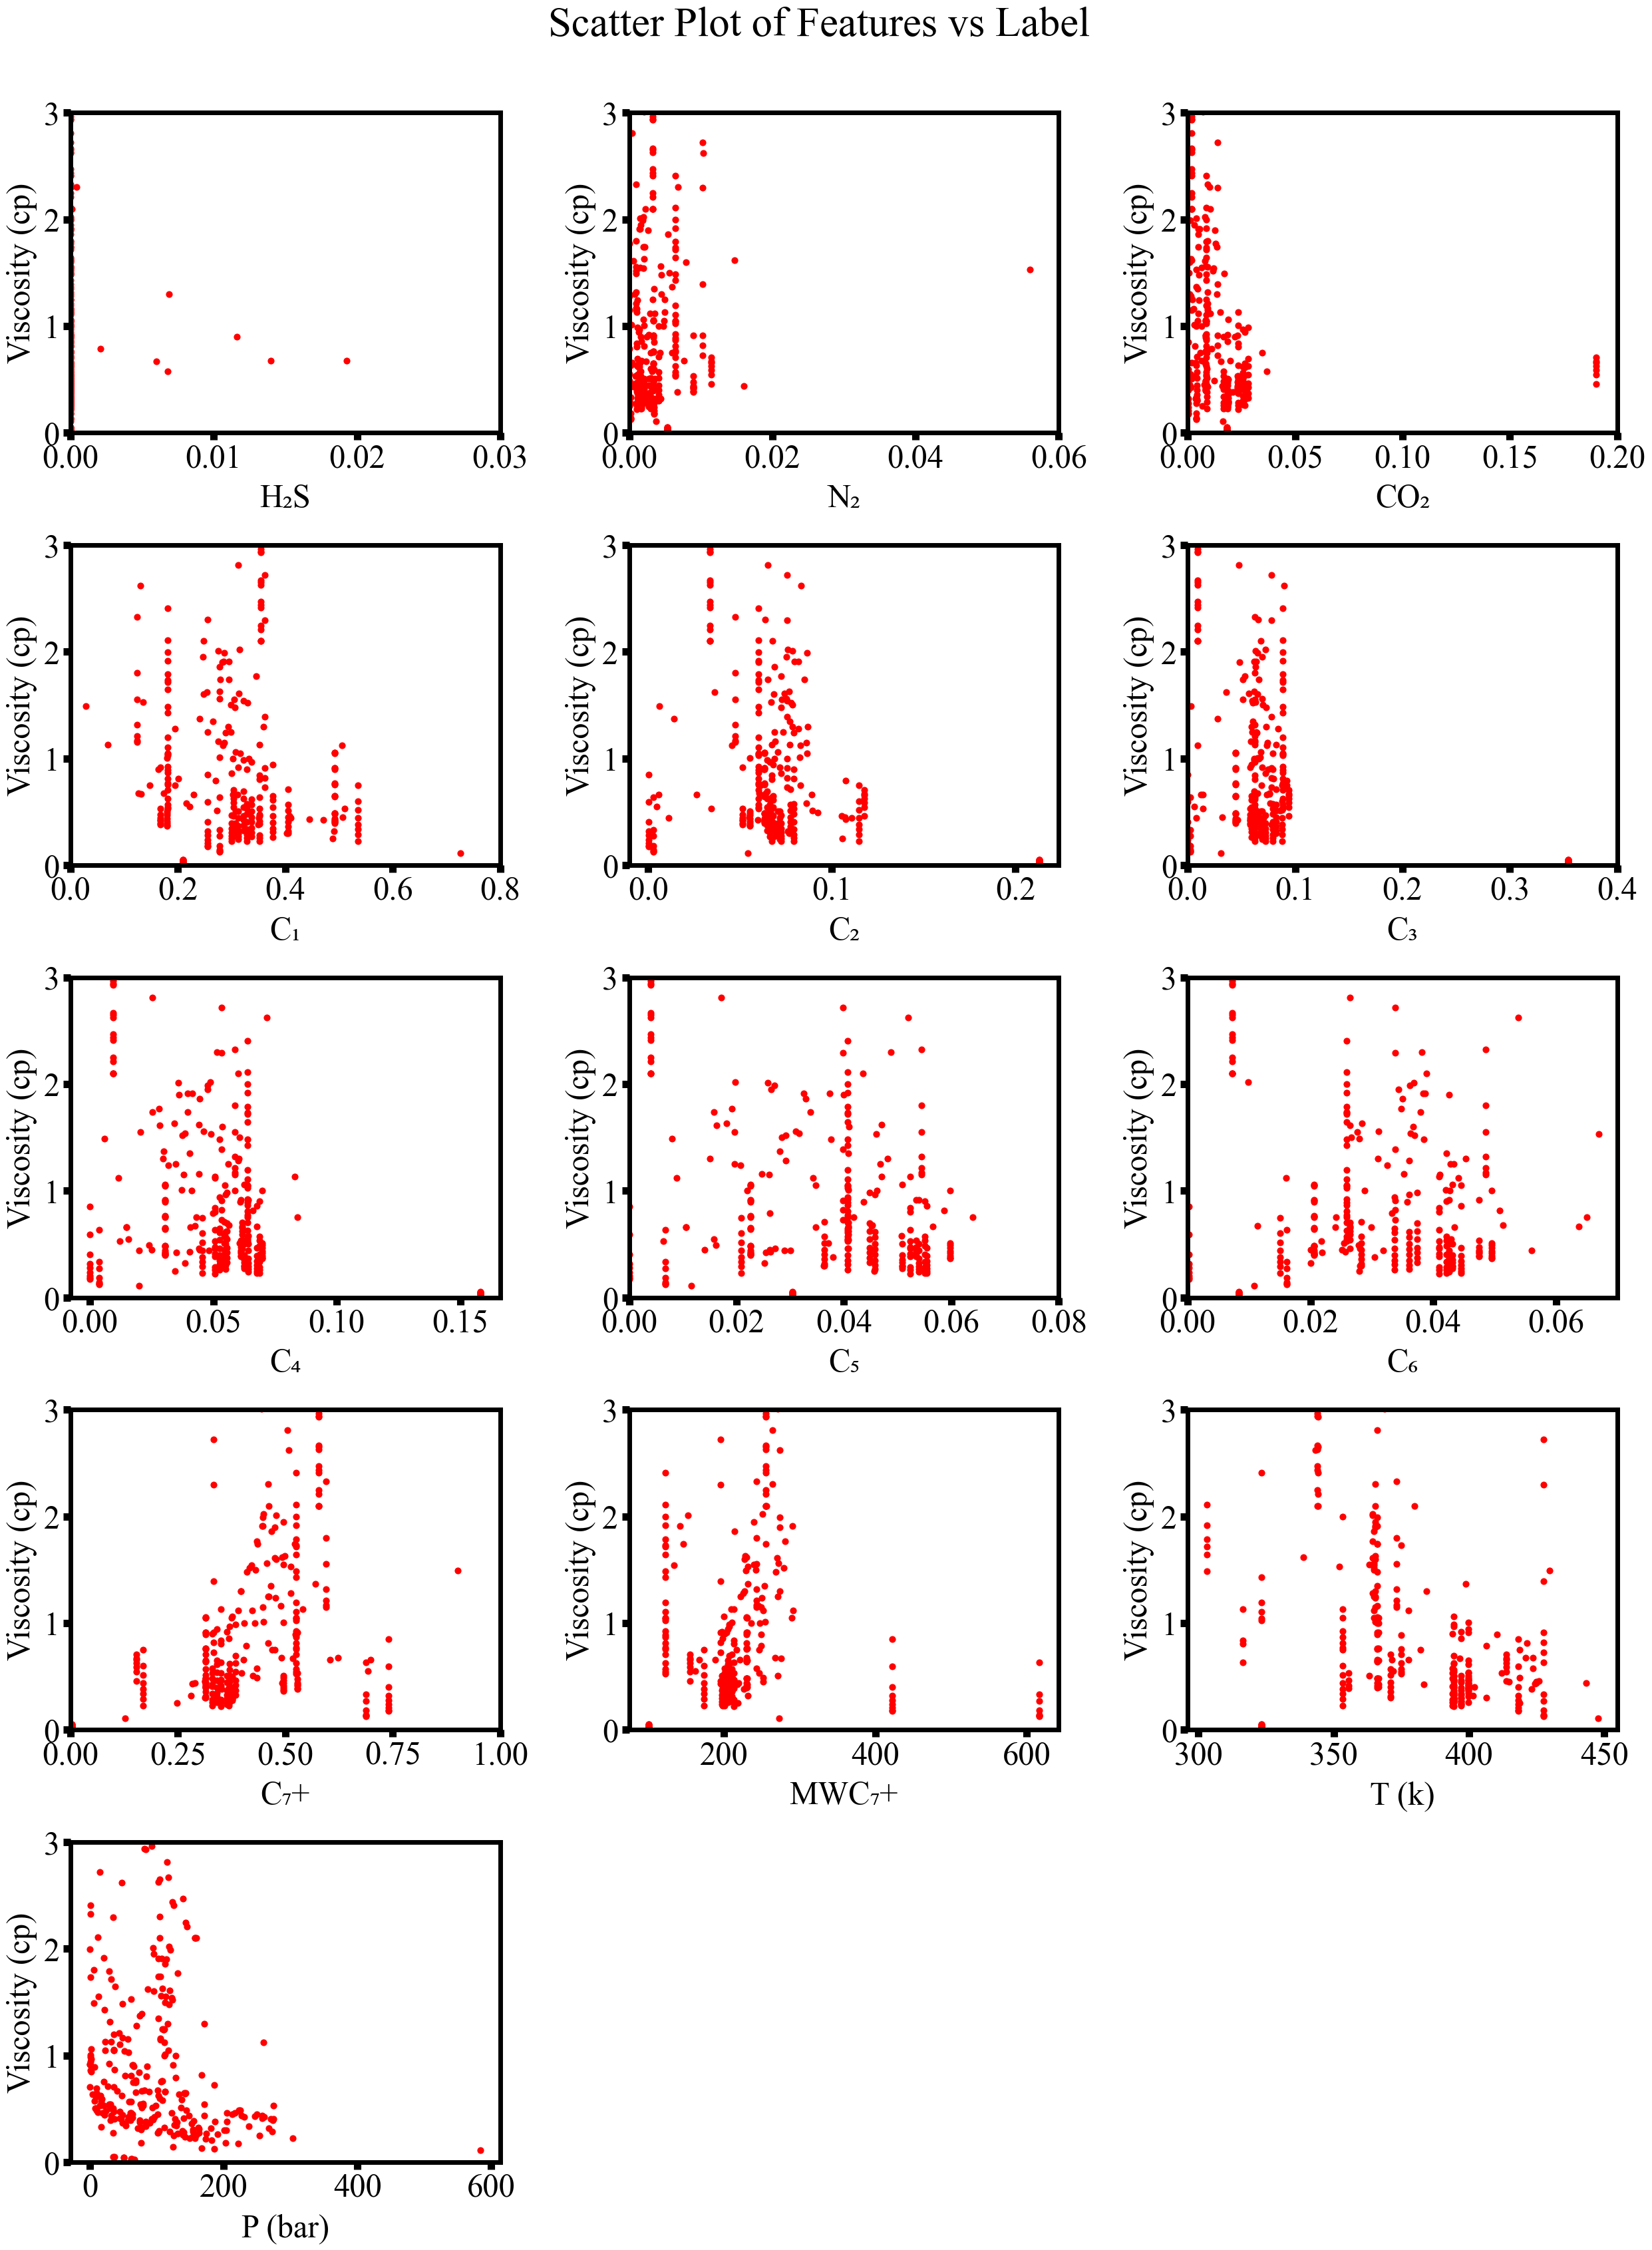

In [44]:
plt.rc('xtick', labelsize=35)
plt.rc('ytick', labelsize=35)
import matplotlib as mpl


mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.major.width'] = 8
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.major.width'] = 8

fig6 = plt.figure(figsize=(30,40) )
plt.suptitle("Scatter Plot of Features vs Label", fontsize = 45 , c = "black",y=0.92)


ax1 = plt.subplot(5,3,1)
plt.scatter(final_dataset["H2S"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("H\u2082S", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)


ax2 = plt.subplot(5,3,2)
plt.scatter(final_dataset["N2"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("N\u2082", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)



ax3 = plt.subplot(5,3,3)
plt.scatter(final_dataset["CO2"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("CO\u2082", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)



ax4 = plt.subplot(5,3,4)
plt.scatter(final_dataset["C1"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("C\u2081", fontsize =35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)


ax5 = plt.subplot(5,3,5)
plt.scatter(final_dataset["C2"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("C\u2082", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)




ax6 = plt.subplot(5,3,6)
plt.scatter(final_dataset["C3"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("C\u2083", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)


ax7 = plt.subplot(5,3,7)
plt.scatter(final_dataset["C4"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("C\u2084", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)

ax8 = plt.subplot(5,3,8)
plt.scatter(final_dataset["C5"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("C\u2085", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)

ax9 = plt.subplot(5,3,9)
plt.scatter(final_dataset["C6"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("C\u2086", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)


ax10 = plt.subplot(5,3,10)
plt.scatter(final_dataset["C7+"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("C\u2087+", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)



ax11 = plt.subplot(5,3,11)
plt.scatter(final_dataset["MWC7+"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("MWC\u2087+", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)


ax12 = plt.subplot(5,3,12)
plt.scatter(final_dataset["Temp"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("T (k)", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)



ax13 = plt.subplot(5,3,13)
plt.scatter(final_dataset["P"],final_dataset["VISCOSITY"],c = "red",s =40)
plt.xlabel("P (bar)", fontsize = 35,labelpad = 10)
plt.ylabel("Viscosity (cp)",fontsize = 35,labelpad = 7)

 
plt.subplots_adjust(wspace=0.3,hspace=0.35)  

#Changing Border thickness of all subplots
for i in range(1,14,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(5)

#Set y axis value for better representation
for i in range(1,14,1):
        locals()["ax"+str(i)].set_ylim(0,3)
        
#Set x axis value for better representation
ax1.set_xlim(0.0,0.03)


ax2.set_xlim(0.0,0.06)


ax3.set_xlim(0.0,0.2)


ax4.set_xlim(0,0.8)


#ax5.set_xlim(0,0.6)


ax6.set_xlim(0,0.4)


#ax7.set_xlim(0,0.2)


ax8.set_xlim(0,0.08)


ax9.set_xlim(0,0.07)


ax10.set_xlim(0,1)







fig6.savefig(figure_path + "SCATTER PLOT PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
#fig6.savefig(tif_figure + "SCATTER PLOT PSAT.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [45]:
finalized = final_dataset.copy()

In [46]:
finalized.to_excel(export_data_path+"FINALDATA.xlsx")

## 4. Selecting Features and Labels

                       #### Splitting Data For Train and Test ####

In [47]:
train , test  = train_test_split(finalized , test_size = 0.30 , random_state = 60)

In [48]:
train

,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,P,VISCOSITY
21,0.0,0.0044,0.0083,0.2775,0.075400,0.069000,0.046100,0.031000,0.0311,0.4572,272.000000,364.816667,106.462585,1.560000
256,0.0,0.0103,0.0138,0.3617,0.075732,0.078068,0.053237,0.039863,0.0338,0.3335,195.711574,427.600000,123.658862,0.911174
97,0.0,0.0033,0.0019,0.3542,0.033600,0.009000,0.009500,0.004000,0.0072,0.5773,255.000000,344.000000,92.753588,2.962963
208,0.0,0.0033,0.0019,0.3542,0.033600,0.009000,0.009500,0.004000,0.0072,0.5773,255.000000,344.250000,104.400000,2.650000
27,0.0,0.0054,0.0050,0.2779,0.068900,0.063400,0.044500,0.032900,0.0350,0.4670,214.000000,364.816667,112.585034,1.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0060,0.0040,0.2400,0.014000,0.028000,0.030000,0.028000,0.0790,0.5700,231.000000,398.705556,74.149660,1.370000
99,0.0,0.0033,0.0019,0.3542,0.033600,0.009000,0.009500,0.004000,0.0072,0.5773,255.000000,344.000000,139.130435,2.469136
70,0.0,0.0560,0.0040,0.1350,0.067000,0.063000,0.049000,0.046000,0.0670,0.5130,231.000000,352.038889,61.224490,1.530000
65,0.0,0.0004,0.0003,0.3018,0.026400,0.012300,0.014900,0.010600,0.0299,0.6034,188.000000,377.594444,112.244898,0.660000


In [49]:
test

,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,P,VISCOSITY
219,0.0000,0.0011,0.0235,0.35210,0.067200,0.062400,0.05070,0.05230,0.0410,0.34970,213.000000,394.260000,159.183673,0.258000
177,0.0000,0.0014,0.0256,0.33640,0.066200,0.062700,0.05500,0.04580,0.0361,0.37080,206.503684,394.260000,91.822405,0.406501
19,0.0004,0.0068,0.0102,0.25490,0.063700,0.065300,0.05150,0.04880,0.0381,0.46030,264.000000,365.372222,104.285714,2.300000
124,0.0000,0.0065,0.0086,0.18062,0.059914,0.088596,0.06392,0.04069,0.0259,0.52525,122.575433,374.800000,75.000000,0.545455
13,0.0000,0.0003,0.0030,0.27800,0.082600,0.067300,0.03720,0.04080,0.0420,0.44880,254.000000,365.372222,111.904762,1.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.0000,0.0011,0.0235,0.35210,0.067200,0.062400,0.05070,0.05230,0.0410,0.34970,213.000000,316.480000,133.197279,0.635000
39,0.0069,0.0008,0.0137,0.35970,0.086700,0.059400,0.02970,0.01500,0.0310,0.39710,274.000000,384.261111,170.408163,1.300000
266,0.0000,0.0017,0.0187,0.29940,0.072400,0.072300,0.06760,0.05540,0.0445,0.36800,197.982772,397.050000,148.564583,0.227505
169,0.0000,0.0016,0.0168,0.32820,0.079100,0.079000,0.06880,0.05510,0.0422,0.32920,200.400058,393.750000,119.551695,0.285366


In [50]:
train_file_name = "TRAIN.csv"
test_file_name = "TEST.csv"
train.to_csv(path+train_file_name , header=True,index=False ,float_format="%.6f")
test.to_csv(path+test_file_name , header=True, index=False,float_format="%.6f")

.......................................THE END........................................................